In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("gurgaon_properties_outlier_treated.csv")

In [3]:
df.head(4)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,...,NaN,NaN,0,0,0,0,1,0,49,687.026667
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,...,2430.0,NaN,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,NaN,2800.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,...,550.0,NaN,1,0,0,0,0,0,22,183.333333


In [4]:
df.shape

(3578, 24)

In [5]:
df.isnull().sum()

sector                 0
property_type          0
society                1
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum              17
facing              1021
agePossession          0
SuperBuiltUpArea    1699
builtUpArea         1977
carpetArea          1729
others                 0
pooja room             0
servant room           0
store room             0
study room             0
furnishing_type        0
luxury_score           0
area_to_bedroom        0
dtype: int64

# Built-up Area

<Axes: xlabel='builtUpArea', ylabel='SuperBuiltUpArea'>

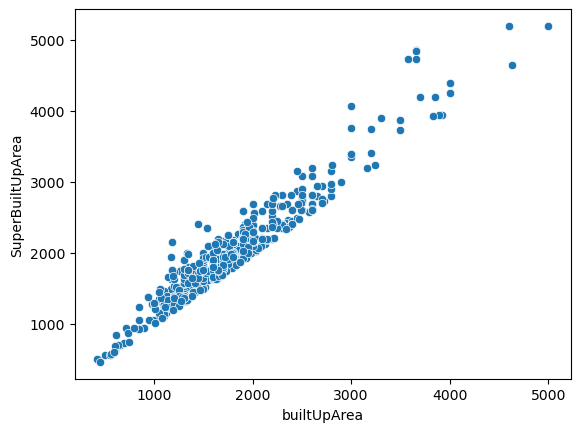

In [7]:
sns.scatterplot(data = df, x = 'builtUpArea', y='SuperBuiltUpArea')

In [8]:
df.columns

Index(['sector', 'property_type', 'society', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'SuperBuiltUpArea', 'builtUpArea', 'carpetArea',
       'others', 'pooja room', 'servant room', 'store room', 'study room',
       'furnishing_type', 'luxury_score', 'area_to_bedroom'],
      dtype='object')

In [9]:
all_null= ((df['SuperBuiltUpArea'].isnull()) & (df['builtUpArea'].isnull()) & (df['carpetArea'].isnull())).sum(
    
)

In [10]:
all_null

0

In [11]:
all_present_df = df[~((df['SuperBuiltUpArea'].isnull()) | (df['builtUpArea'].isnull()) | (df['carpetArea'].isnull()))]

In [12]:
super_built_up_ratio =  (all_present_df['SuperBuiltUpArea'] / all_present_df['builtUpArea']).median()

In [13]:
super_built_up_ratio

1.1052289815447711

In [14]:
carpet_area_ratio = (all_present_df['carpetArea'] / all_present_df['builtUpArea']).median()

In [15]:
carpet_area_ratio

0.9

In [16]:
sbc_df = df[(~df['SuperBuiltUpArea'].isnull()) & (df['builtUpArea'].isnull()) & (~df['carpetArea'].isnull())]

In [17]:
sbc_df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
20,sector 111,flat,puri diplomatic greens,2.65,13589.0,1950.11,Super Built up area 2215(205.78 sq.m.)Carpet a...,3.0,4.0,2,...,NaN,1950.0,0,0,1,0,0,2,159,650.036667
29,sector 92,flat,bestech park view sanskruti,1.60,7547.0,2120.05,Super Built up area 2120(196.95 sq.m.)Carpet a...,3.0,3.0,3,...,NaN,1450.0,0,0,1,0,0,2,60,706.683333
35,sector 70,flat,shree vardhman victoria,1.75,8205.0,2132.85,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,5.0,3,...,NaN,1161.0,0,1,1,0,0,0,37,710.950000
49,sector 81,flat,bestech park view ananda,0.88,8042.0,1094.26,Super Built up area 1360(126.35 sq.m.)Carpet a...,2.0,2.0,3,...,NaN,1094.0,0,0,0,0,1,2,95,547.130000
52,sector 22,flat,ambience creacions,4.10,28101.0,1459.02,Super Built up area 2781(258.36 sq.m.)Carpet a...,3.0,3.0,3+,...,NaN,1459.0,0,0,0,0,0,1,119,486.340000


In [18]:
sbc_df['builtUpArea'].fillna(round(((sbc_df['SuperBuiltUpArea'] / 1.105) + (sbc_df['carpetArea'] / 0.9))/2), inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/1701565693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['builtUpArea'].fillna(round(((sbc_df['SuperBuiltUpArea'] / 1.105) + (sbc_df['carpetArea'] / 0.9))/2), inplace=True)
/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/1701565693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

sector                 0
property_type          0
society                1
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum              17
facing              1021
agePossession          0
SuperBuiltUpArea    1699
builtUpArea         1558
carpetArea          1729
others                 0
pooja room             0
servant room           0
store room             0
study room             0
furnishing_type        0
luxury_score           0
area_to_bedroom        0
dtype: int64

In [21]:
sb_df = df[(~df['SuperBuiltUpArea'].isnull()) & (df['builtUpArea'].isnull()) & (df['carpetArea'].isnull())]

In [22]:
sb_df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,...,NaN,NaN,0,0,0,0,1,0,49,687.026667
7,sector 80,flat,godrej frontier,1.60,7000.0,2285.71,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,NaN,NaN,0,0,1,0,0,0,53,761.903333
13,sector 67,flat,bestech park view spa next,3.32,12599.0,2635.13,Super Built up area 2635(244.8 sq.m.),4.0,5.0,3+,...,NaN,NaN,0,0,1,0,0,2,174,658.782500
14,sector 95,flat,ramsons kshitij,0.28,3650.0,767.12,Super Built up area 767(71.26 sq.m.),2.0,2.0,2,...,NaN,NaN,1,0,0,0,0,0,0,383.560000
15,sector 104,flat,ats triumph,2.65,8412.0,3150.26,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,...,NaN,NaN,0,0,1,0,0,0,174,787.565000


In [23]:
sb_df['builtUpArea'].fillna(round(df['SuperBuiltUpArea'] / 1.105), inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/289426161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['builtUpArea'].fillna(round(df['SuperBuiltUpArea'] / 1.105), inplace=True)
/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/289426161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built

In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

sector                 0
property_type          0
society                1
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum              17
facing              1021
agePossession          0
SuperBuiltUpArea    1699
builtUpArea          678
carpetArea          1729
others                 0
pooja room             0
servant room           0
store room             0
study room             0
furnishing_type        0
luxury_score           0
area_to_bedroom        0
dtype: int64

In [26]:
c_df = df[(df['SuperBuiltUpArea'].isnull()) & (df['builtUpArea'].isnull()) & (~df['carpetArea'].isnull())]

In [27]:
c_df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,NaN,2800.0,0,0,1,0,0,0,20,700.102500
25,sector 48,flat,central park 2 bellevue,5.00,11627.0,4300.34,Carpet area: 4300 (399.48 sq.m.),3.0,4.0,3,...,NaN,4300.0,0,0,0,0,0,0,82,1433.446667
27,sector 89,flat,m3m soulitude,1.28,8827.0,1450.10,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,2,...,NaN,1450.0,0,0,0,0,1,0,114,483.366667
28,sector 104,flat,ats triumph,1.80,7860.0,2290.08,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3,...,NaN,2290.0,0,0,0,0,0,0,60,763.360000
33,sector 92,flat,apartment,0.75,4687.0,1600.17,Carpet area: 1600 (148.64 sq.m.),3.0,4.0,3,...,NaN,1600.0,0,0,0,0,1,0,113,533.390000


In [28]:
c_df['builtUpArea'].fillna(round(c_df['carpetArea'] / 0.9), inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/2544035939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['builtUpArea'].fillna(round(c_df['carpetArea'] / 0.9), inplace=True)
/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/2544035939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['builtUpArea

In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

sector                 0
property_type          0
society                1
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum              17
facing              1021
agePossession          0
SuperBuiltUpArea    1699
builtUpArea            0
carpetArea          1729
others                 0
pooja room             0
servant room           0
store room             0
study room             0
furnishing_type        0
luxury_score           0
area_to_bedroom        0
dtype: int64

In [31]:
df['builtUpArea'].describe()

count     3578.000000
mean      1821.561487
std       1525.200575
min         30.000000
25%       1154.000000
50%       1583.000000
75%       2136.500000
max      36000.000000
Name: builtUpArea, dtype: float64

In [32]:
df = df[df['builtUpArea'] <= 13000]

<Axes: xlabel='builtUpArea', ylabel='price'>

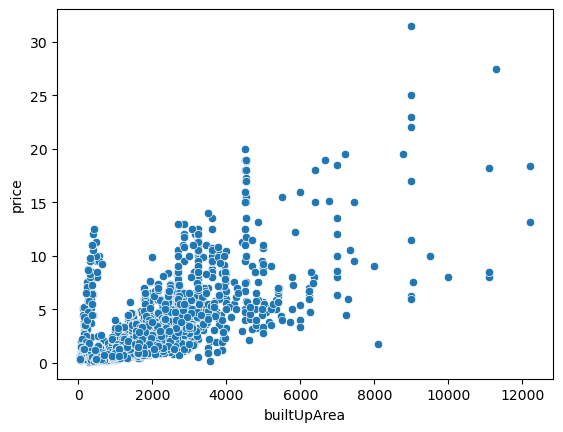

In [33]:
sns.scatterplot(data = df, x = 'builtUpArea', y='price')

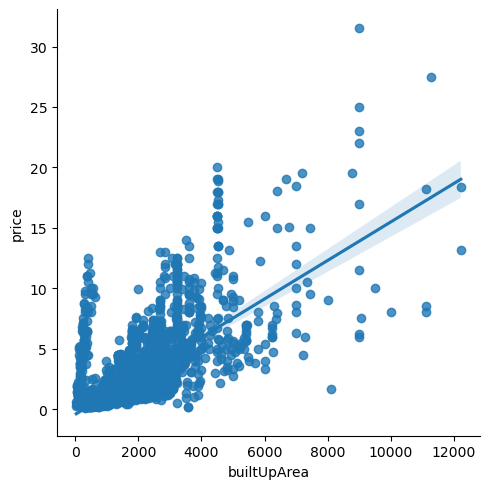

In [34]:
sns.lmplot(data = df, x='builtUpArea', y = 'price')

In [35]:
pd.set_option('display.max_rows', None)
anomally_df = df[(df['builtUpArea'] < 2000) & (df['price'] > 2.5)][['builtUpArea', 'area', 'price']]

In [36]:
anomally_df.sample(5)

,builtUpArea,area,price
1702,200.0,1620.00,4.25
3372,1869.0,2395.01,3.65
101,1935.0,1935.00,5.80
2287,1460.0,1460.00,4.60
1905,160.0,1440.00,3.50


In [37]:
anomally_df['builtUpArea'] = anomally_df['area']

In [38]:
df.update(anomally_df)

<Axes: xlabel='builtUpArea', ylabel='price'>

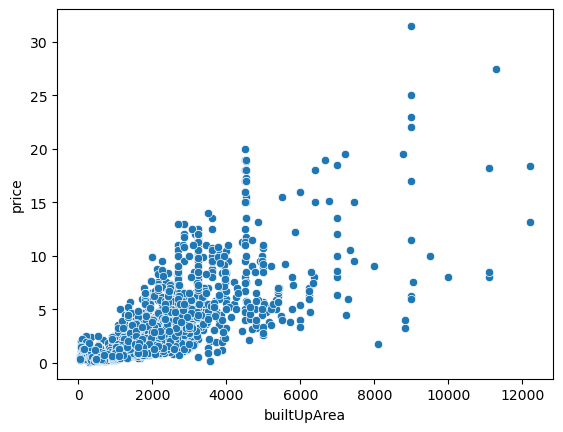

In [39]:
sns.scatterplot(data=df, x='builtUpArea', y='price')

In [40]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,...,1865.0,NaN,0,0,0,0,1,0,49,687.026667
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,...,2430.0,NaN,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,3111.0,2800.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,...,550.0,NaN,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,...,1711.0,1611.0,0,0,0,0,0,2,149,603.710000


# floorNum

In [42]:
df[df['floorNum'].isnull()]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
51,sushant lok,house,ansal sushant lok,10.50,27911.0,3762.00,Plot area 418(349.5 sq.m.),4.0,4.0,2.0,...,3762.0,NaN,0,0,1,0,0,0,59,940.500000
85,sector 66,house,emaar mgf marbella,9.00,21251.0,4235.10,Plot area 5605(520.72 sq.m.)Built Up area: 520...,4.0,4.0,3+,...,5200.0,4235.0,0,1,1,1,0,2,114,1058.775000
396,sector 4,house,independent,4.12,8889.0,4634.90,Plot area 515(430.61 sq.m.),2.0,1.0,3+,...,4635.0,NaN,0,0,0,0,0,0,0,2317.450000
850,sector 26,house,independent,4.60,12198.0,3771.10,Plot area 419(350.34 sq.m.),4.0,4.0,3+,...,3771.0,NaN,0,0,0,0,0,0,28,942.775000
1048,sushant lok,house,ansal sushant lok plots,3.30,26570.0,1242.00,Plot area 138(115.39 sq.m.),1.0,1.0,0,...,1242.0,NaN,0,0,0,0,0,0,0,1242.000000
1139,sector 78,flat,NaN,0.60,3692.0,1625.14,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,1625.0,NaN,0,0,0,0,0,0,0,812.570000
1399,sector 86,house,dlf new town heights,2.47,7718.0,3200.30,Plot area 3200(297.29 sq.m.)Built Up area: 280...,4.0,4.0,3+,...,2800.0,2200.0,0,1,1,0,0,2,130,800.075000
2016,sector 3,house,independent,1.50,10288.0,1458.00,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,3.0,3.0,0,...,210.0,NaN,0,0,0,0,0,0,0,486.000000
2162,sector 48,house,vipul tatvam villa,8.50,26235.0,3239.90,Plot area 360(301.01 sq.m.),4.0,4.0,1.0,...,3240.0,NaN,0,0,0,0,0,0,21,809.975000
2179,dlf phase,house,independent,1.45,2984.0,4860.00,Plot area 60(50.17 sq.m.),3.0,3.0,1.0,...,540.0,NaN,0,0,0,0,0,0,9,1620.000000


In [43]:
avg_floorNum_for_houses = df[df['property_type'] == 'house']['floorNum'].median()

In [44]:
avg_floorNum_for_houses

2.0

In [45]:
houses_floorNum_filled = df[df['property_type'] == 'house']['floorNum'].fillna(avg_floorNum_for_houses)

In [46]:
houses_floorNum_filled

1        2.0
3        3.0
10       1.0
12       3.0
21       4.0
22       3.0
41       4.0
51       2.0
59       3.0
61       3.0
62      51.0
63       2.0
74       2.0
75       4.0
80       3.0
81       2.0
85       2.0
89       3.0
91       2.0
100      3.0
101      2.0
109      2.0
115      3.0
120      3.0
125      2.0
126      1.0
128      4.0
133      1.0
134      4.0
137      2.0
149      2.0
154      2.0
155      1.0
158      2.0
160      2.0
163      3.0
164      1.0
166      4.0
171      2.0
177      2.0
203      2.0
211      4.0
215      2.0
216      3.0
219      2.0
221      1.0
225      2.0
231      3.0
242      3.0
244      1.0
245      2.0
257      4.0
263      1.0
265      1.0
266      2.0
272      2.0
280      3.0
285      3.0
289      3.0
291      1.0
307      2.0
320      2.0
326      1.0
329      2.0
331      4.0
334     12.0
339      3.0
360      2.0
371      1.0
375      3.0
379      2.0
381      3.0
382      4.0
385      3.0
391      1.0
394      3.0
396      2.0

In [47]:
df.update(houses_floorNum_filled)

In [48]:
avg_floorNum_for_flats = df[df['property_type'] == 'flat']['floorNum'].median()

In [49]:
avg_floorNum_for_flats

7.0

In [50]:
flats_floorNum_filled = df[df['property_type'] == 'flat']['floorNum'].fillna(avg_floorNum_for_flats)

In [51]:
df.update(flats_floorNum_filled)

In [52]:
df.isnull().sum()

sector                 0
property_type          0
society                1
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
facing              1019
agePossession          0
SuperBuiltUpArea    1695
builtUpArea            0
carpetArea          1725
others                 0
pooja room             0
servant room           0
store room             0
study room             0
furnishing_type        0
luxury_score           0
area_to_bedroom        0
dtype: int64

In [53]:
df.drop(columns = ['SuperBuiltUpArea', 'carpetArea'], inplace=True)

In [54]:
df.isnull().sum()

sector                0
property_type         0
society               1
price                 0
price_per_sqft        0
area                  0
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1019
agePossession         0
builtUpArea           0
others                0
pooja room            0
servant room          0
store room            0
study room            0
furnishing_type       0
luxury_score          0
area_to_bedroom       0
dtype: int64

In [55]:
df[df['facing'].isnull()]

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,...,Moderately Old,2430.00,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,...,New Property,3111.00,0,0,1,0,0,0,20,700.102500
6,sector 102,flat,shapoorji pallonji joyville gurugram,1.60,11700.0,1367.52,Built Up area: 1368 (127.09 sq.m.),2.0,2.0,3,...,Moderately Old,1368.00,0,0,0,0,0,0,0,683.760000
7,sector 80,flat,godrej frontier,1.60,7000.0,2285.71,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,...,Moderately Old,2047.00,0,0,1,0,0,0,53,761.903333
23,sector 37c,flat,ild greens,1.05,7500.0,1400.00,Super Built up area 1875(174.19 sq.m.)Built Up...,3.0,3.0,3,...,New Property,1500.00,0,0,0,0,0,2,5,466.666667
26,sector 79,flat,godrej,1.29,8206.0,1572.02,Super Built up area 1572(146.04 sq.m.),2.0,2.0,3,...,New Property,1423.00,0,0,0,0,0,0,0,786.010000
27,sector 89,flat,m3m soulitude,1.28,8827.0,1450.10,Carpet area: 1450 (134.71 sq.m.),3.0,3.0,2,...,Under Construction,1611.00,0,0,0,0,1,0,114,483.366667
28,sector 104,flat,ats triumph,1.80,7860.0,2290.08,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3,...,New Property,2544.00,0,0,0,0,0,0,60,763.360000
35,sector 70,flat,shree vardhman victoria,1.75,8205.0,2132.85,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,5.0,3,...,New Property,1527.00,0,1,1,0,0,0,37,710.950000
40,sector 102,flat,shapoorji pallonji joyville gurugram,2.12,16960.0,1250.00,Built Up area: 1852 (172.06 sq.m.)Carpet area:...,3.0,3.0,3,...,Relatively New,1852.00,0,0,0,0,0,0,72,416.666667


<Axes: ylabel='count'>

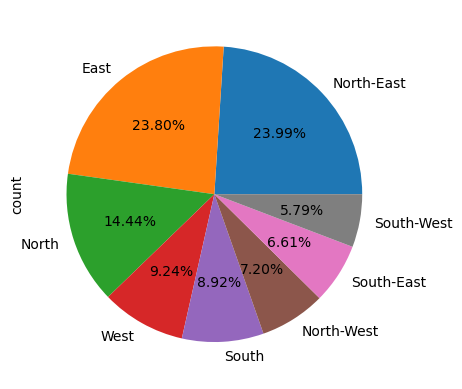

In [56]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['facing'] =  encoder.fit_transform(df['facing'])

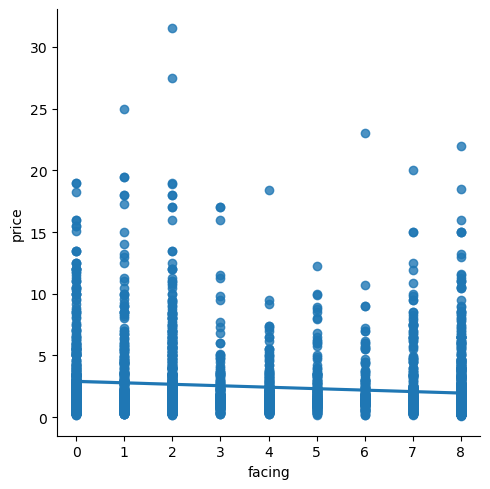

In [58]:
sns.lmplot(data=df, x='facing', y='price')

In [59]:
df.drop(columns=['facing'], inplace=True)

In [60]:
df.sample(5)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
850,sector 26,house,independent,4.6,12198.0,3771.10,Plot area 419(350.34 sq.m.),4.0,4.0,3+,...,Old Property,3771.0,0,0,0,0,0,0,28,942.775000
3523,sector 89,flat,smart world gems,1.2,12526.0,958.01,Carpet area: 958 (89 sq.m.),3.0,3.0,3,...,Under Construction,1064.0,0,1,0,1,0,0,131,319.336667
3139,sector 71,flat,chd avenue,1.1,6104.0,1802.10,Super Built up area 1802(167.41 sq.m.),3.0,4.0,3,...,Moderately Old,1631.0,0,0,1,0,0,0,26,600.700000
817,sohna road road,flat,micasa sec 68,1.5,12244.0,1225.09,Carpet area: 1225 (113.81 sq.m.),2.0,2.0,3,...,New Property,1361.0,0,0,0,0,0,0,44,612.545000
3013,sector 66,flat,emaar mgf palm terraces select,3.4,14107.0,2410.15,Super Built up area 2410(223.9 sq.m.)Built Up ...,4.0,4.0,3+,...,Relatively New,2210.0,0,0,1,0,0,2,157,602.537500


In [61]:
df['society'].fillna('independent', inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_3458/3479342557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['society'].fillna('independent', inplace=True)


In [62]:
df.isnull().sum()

sector             0
property_type      0
society            0
price              0
price_per_sqft     0
area               0
areaWithType       0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
builtUpArea        0
others             0
pooja room         0
servant room       0
store room         0
study room         0
furnishing_type    0
luxury_score       0
area_to_bedroom    0
dtype: int64

# AgePossession

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1611
New Property           561
Moderately Old         549
Old Property           297
Undefined              290
Under Construction     266
Name: count, dtype: int64

In [65]:
df[df['agePossession'] == 'Undefined']

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
8,sector 78,flat,umang monsoon breeze,0.75,6053.0,1239.06,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2.0,2.0,1,...,Undefined,1239.00,0,0,0,0,0,0,0,619.530000
10,sector 3,house,independent,0.40,8000.0,500.00,Built Up area: 500 (46.45 sq.m.)Carpet area: 3...,2.0,1.0,0,...,Undefined,500.00,0,0,0,0,0,0,0,250.000000
41,sector 52,house,raj villas,8.00,25543.0,3132.00,Carpet area: 348 (290.97 sq.m.),6.0,5.0,3+,...,Undefined,3132.00,0,0,0,0,0,0,0,522.000000
44,sector 65,flat,m3m heights,2.78,15200.0,1828.95,Super Built up area 1828(169.83 sq.m.),3.0,3.0,3,...,Undefined,1828.95,0,0,0,0,0,0,56,609.650000
75,sector 33,house,unitech uniworld resorts,8.00,17778.0,4499.90,Built Up area: 500 (418.06 sq.m.),6.0,5.0,3+,...,Undefined,4499.90,0,0,0,0,0,0,0,749.983333
79,sector 89,flat,smart world gems,1.20,8433.0,1422.98,Built Up area: 1423 (132.2 sq.m.)Carpet area: ...,3.0,3.0,2,...,Undefined,1423.00,0,0,0,0,0,0,45,474.326667
94,sector 67,flat,m3m one key resiments,0.80,13115.0,609.99,Built Up area: 610 (56.67 sq.m.),1.0,1.0,0,...,Undefined,610.00,0,0,0,0,0,0,0,609.990000
107,sector 108,flat,raheja vedaanta,1.00,4854.0,2060.16,Built Up area: 2060 (191.38 sq.m.)Carpet area:...,2.0,2.0,2,...,Undefined,2060.00,0,0,0,0,0,0,0,1030.080000
109,sector 50,house,independent,13.20,27155.0,4861.00,Built Up area: 4861 (451.6 sq.m.),6.0,6.0,0,...,Undefined,4861.00,0,0,0,0,0,0,0,810.166667
118,sector 62,flat,senate court,0.90,14084.0,639.02,Built Up area: 639 (59.37 sq.m.),1.0,1.0,0,...,Undefined,639.00,0,0,0,0,0,0,0,639.020000


In [66]:
from collections import Counter

In [67]:
def imputation_agePossession(row):
    if row['agePossession'] == 'Undefined':
        most_frequent = Counter(df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'])

        if most_frequent.most_common(1)[0][0] != 'Undefined':
            return most_frequent.most_common(1)[0][0]
        else:
            try:
                return most_frequent.most_common()[1][0]
            except IndexError as e:
                return 'Undefined'
    else:
        return row['agePossession']

In [68]:
df['agePossession'] =  df.apply(imputation_agePossession, axis=1)

In [69]:
df['agePossession'].value_counts()

agePossession
Relatively New        1748
New Property           601
Moderately Old         589
Old Property           347
Under Construction     281
Undefined                8
Name: count, dtype: int64

In [70]:
undefined_indices = df[df['agePossession'] == 'Undefined'].index

In [71]:
df.drop(index=undefined_indices, inplace=True)

In [72]:
df.isnull().sum()

sector             0
property_type      0
society            0
price              0
price_per_sqft     0
area               0
areaWithType       0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
builtUpArea        0
others             0
pooja room         0
servant room       0
store room         0
study room         0
furnishing_type    0
luxury_score       0
area_to_bedroom    0
dtype: int64

In [73]:
df.shape

(3566, 21)

In [74]:
pd.set_option('display.max_columns', None)
df.head(10)

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,49,687.026667
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,149,603.710000
5,sector 106,flat,paras dews,0.92,6642.0,1385.12,Super Built up area 1385(128.67 sq.m.)Built Up...,2.0,2.0,3+,2.0,Relatively New,940.0,0,0,0,0,0,0,174,692.560000
6,sector 102,flat,shapoorji pallonji joyville gurugram,1.60,11700.0,1367.52,Built Up area: 1368 (127.09 sq.m.),2.0,2.0,3,14.0,Moderately Old,1368.0,0,0,0,0,0,0,0,683.760000
7,sector 80,flat,godrej frontier,1.60,7000.0,2285.71,Super Built up area 2262(210.15 sq.m.),3.0,3.0,3,5.0,Moderately Old,2047.0,0,0,1,0,0,0,53,761.903333
8,sector 78,flat,umang monsoon breeze,0.75,6053.0,1239.06,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2.0,2.0,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0,619.530000
9,sector 86,flat,dlf the skycourt,1.58,8190.0,1929.18,Super Built up area 1929(179.21 sq.m.)Built Up...,3.0,3.0,1,16.0,Relatively New,1750.0,0,1,0,0,0,2,152,643.060000


In [75]:
df.drop(columns=['areaWithType'], inplace=True)

In [76]:
df.head(10)

,sector,property_type,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,49,687.026667
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,independent,0.66,12000.0,550.00,3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,149,603.710000
5,sector 106,flat,paras dews,0.92,6642.0,1385.12,2.0,2.0,3+,2.0,Relatively New,940.0,0,0,0,0,0,0,174,692.560000
6,sector 102,flat,shapoorji pallonji joyville gurugram,1.60,11700.0,1367.52,2.0,2.0,3,14.0,Moderately Old,1368.0,0,0,0,0,0,0,0,683.760000
7,sector 80,flat,godrej frontier,1.60,7000.0,2285.71,3.0,3.0,3,5.0,Moderately Old,2047.0,0,0,1,0,0,0,53,761.903333
8,sector 78,flat,umang monsoon breeze,0.75,6053.0,1239.06,2.0,2.0,1,5.0,Moderately Old,1239.0,0,0,0,0,0,0,0,619.530000
9,sector 86,flat,dlf the skycourt,1.58,8190.0,1929.18,3.0,3.0,1,16.0,Relatively New,1750.0,0,1,0,0,0,2,152,643.060000


In [77]:
train_df = df.drop(columns = ['society', 'price_per_sqft'])

In [78]:
train_df.head()

,sector,property_type,price,area,bedRoom,bathroom,balcony,floorNum,agePossession,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom
0,sector 49,flat,2.45,2061.08,3.0,3.0,3,0.0,Relatively New,1865.0,0,0,0,0,1,0,49,687.026667
1,sector 109,house,6.10,2430.00,5.0,6.0,3+,2.0,Moderately Old,2430.0,0,0,1,0,0,0,30,486.000000
2,sector 1,flat,1.65,2800.41,4.0,3.0,3,8.0,New Property,3111.0,0,0,1,0,0,0,20,700.102500
3,sector 7,house,0.66,550.00,3.0,1.0,1.0,3.0,Relatively New,550.0,1,0,0,0,0,0,22,183.333333
4,sector 37d,flat,1.40,1811.13,3.0,3.0,3,5.0,Relatively New,1711.0,0,0,0,0,0,2,149,603.710000


In [155]:
train_df.to_csv("gurgaon_properties_missing_value_imputed.csv", index=False)